In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Data loading from local file

In [2]:
df=pd.read_csv('D:\\Driuve D\\data\\Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.shape

(418, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [14]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# Data cleaning


In [16]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

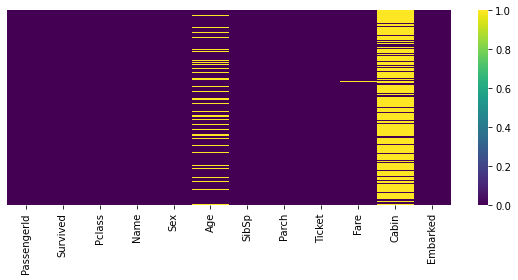

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.show()

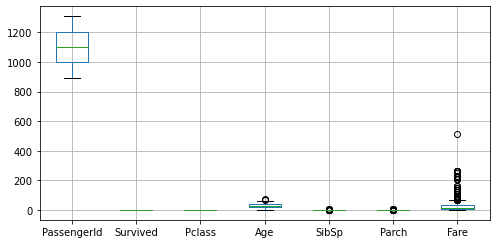

In [13]:
df.boxplot()
plt.show()

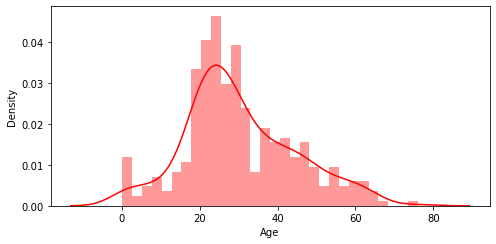

In [16]:
sns.distplot(df['Age'].dropna(),bins=30,kde=True,color='r')
plt.show()

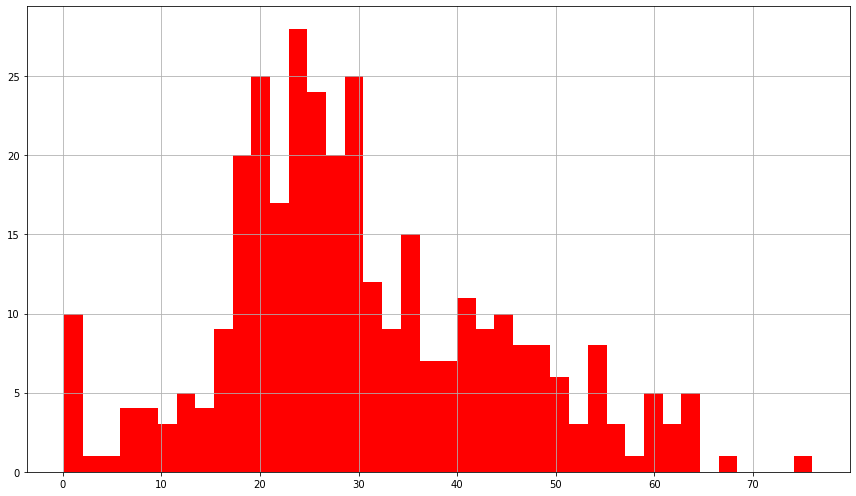

In [18]:
df['Age'].hist(bins=40,figsize=(12,7),color='r')
plt.show()

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

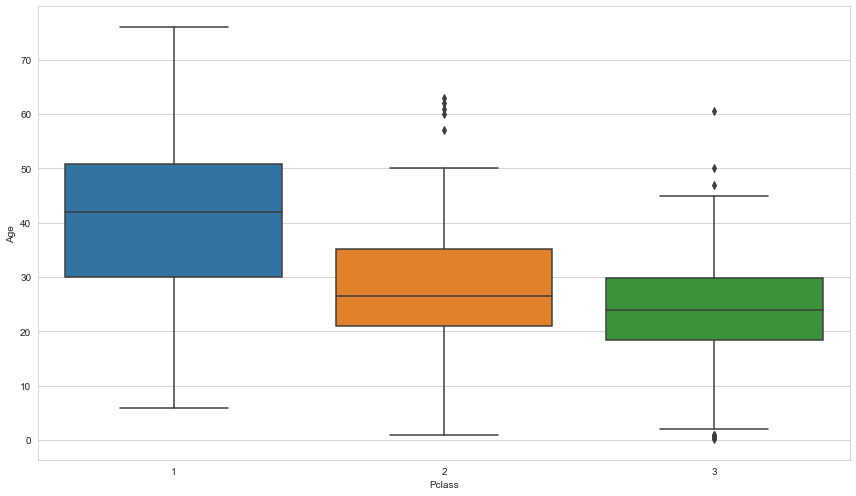

In [21]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

In [22]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [23]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

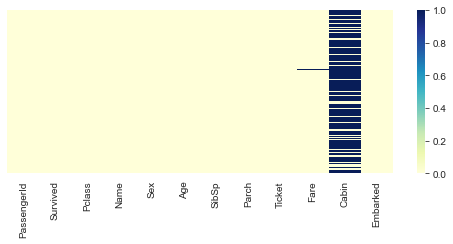

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='YlGnBu')
plt.show()

In [27]:
df.drop('Cabin',axis=1,inplace=True)

In [28]:
df.dropna(inplace=True)

# Data visualizing

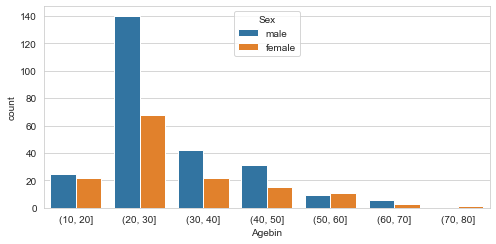

In [33]:
sns.set_style('whitegrid')
sns.countplot('Agebin',data=df,hue='Sex')
bins=[10,20,30,40,50,60,70,80]
df['Agebin']=pd.cut(df['Age'],bins)

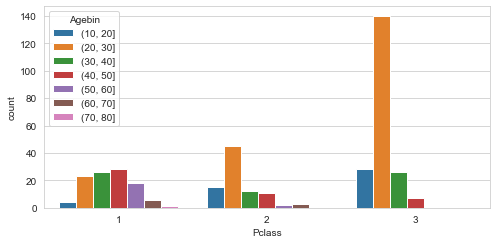

In [34]:
sns.set_style('whitegrid')
sns.countplot('Pclass',data=df,hue='Agebin')
plt.show()

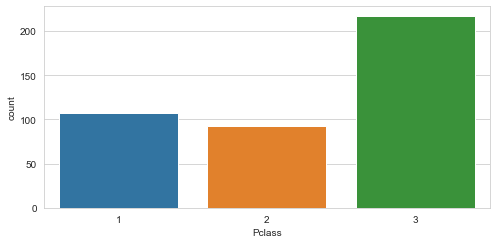

In [35]:
sns.set_style('whitegrid')
sns.countplot('Pclass',data=df)
plt.show()

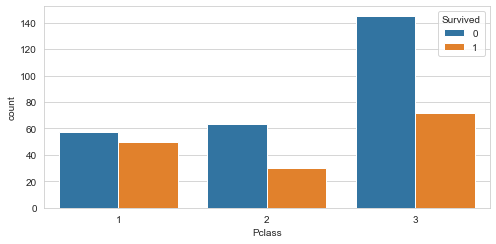

In [37]:
sns.set_style('whitegrid')
sns.countplot('Pclass',data=df,hue='Survived')
plt.show()

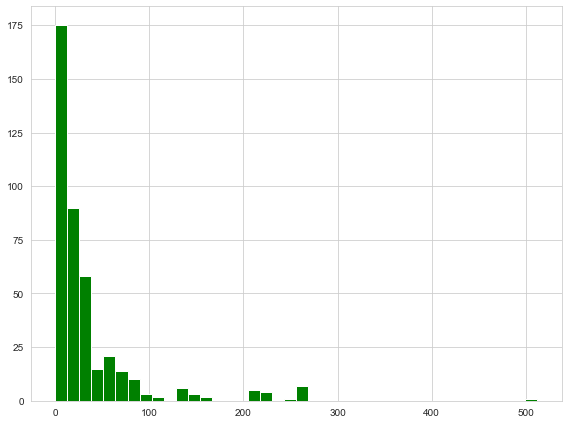

In [38]:
df['Fare'].hist(bins=40,color='g',figsize=(8,6))
plt.show()

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agebin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,"(30, 40]"
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,"(40, 50]"
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,"(60, 70]"
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,"(20, 30]"
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,"(20, 30]"


In [40]:
Sex=pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [41]:
pd.concat([df,Sex,Embarked],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agebin,male,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,"(30, 40]",1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,"(40, 50]",0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,"(60, 70]",1,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,"(20, 30]",1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,"(20, 30]",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,"(20, 30]",1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,"(30, 40]",0,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,"(30, 40]",1,0,1
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,"(20, 30]",1,0,1


In [42]:
df.drop('Ticket',axis=1,inplace=True)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Agebin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,"(30, 40]"
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,"(40, 50]"
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,"(60, 70]"
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,"(20, 30]"
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,"(20, 30]"


In [44]:
df=pd.concat([df,Sex,Embarked],axis=1)

# Another way of approaching

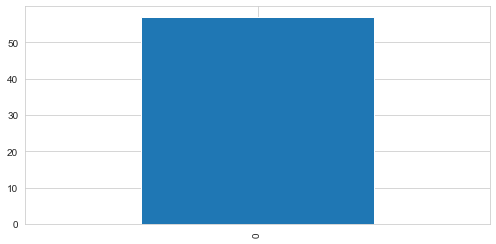

In [54]:
df[(df['Pclass']==1) & (df['Sex']=='male')]['Survived'].sort_index().value_counts().plot(kind='bar')
plt.show()

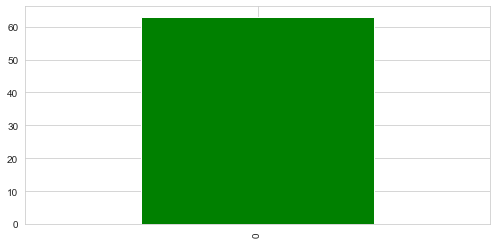

In [55]:
df[(df['Pclass']==2) & (df['Sex']=='male')]['Survived'].sort_index().value_counts().plot(kind='bar',color='g')
plt.show()

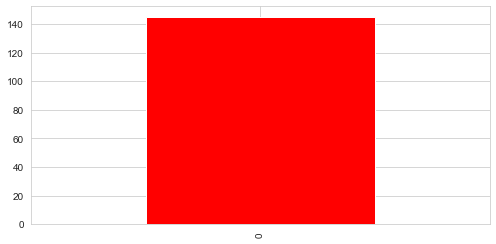

In [56]:
df[(df['Pclass']==3) & (df['Sex']=='male')]['Survived'].sort_index().value_counts().plot(kind='bar',color='r')
plt.show()

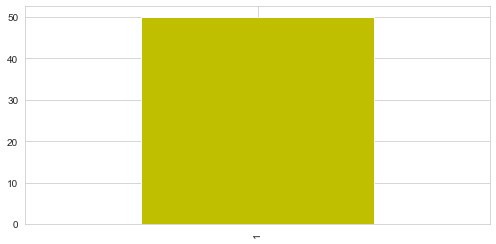

In [57]:
df[(df['Pclass']==1) & (df['Sex']=='female')]['Survived'].sort_index().value_counts().plot(kind='bar',color='y')
plt.show()

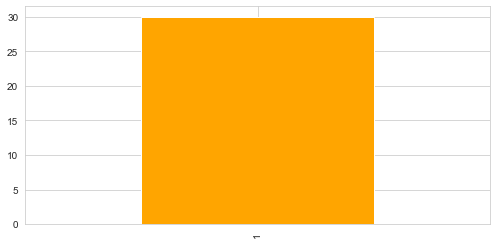

In [58]:
df[(df['Pclass']==2) & (df['Sex']=='female')]['Survived'].sort_index().value_counts().plot(kind='bar',color='orange')
plt.show()

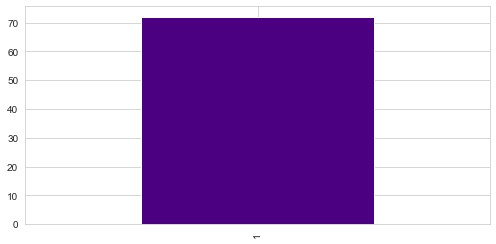

In [59]:
df[(df['Pclass']==3) & (df['Sex']=='female')]['Survived'].sort_index().value_counts().plot(kind='bar',color='indigo')
plt.show()

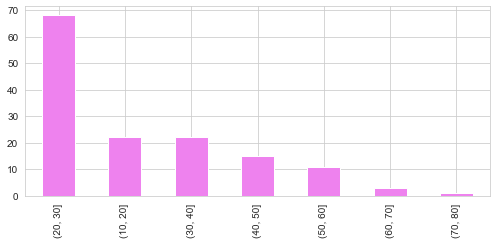

In [61]:
df[df['Survived']==1]['Agebin'].value_counts().plot(kind='bar',color='violet')
plt.show()

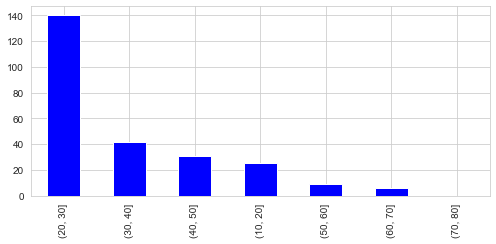

In [62]:
df[df['Survived']==0]['Agebin'].value_counts().plot(kind='bar',color='b')
plt.show()